In [107]:
#import necessary modules
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [47]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras.layers import Dense, Dropout, Flatten, Activation
import tensorflow
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import validation_curve

In [48]:
import numpy as np

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [50]:
import time
import random
np.random.seed(21)

In [51]:
import tensorflow as tf 
tf.random.set_seed(2)

In [52]:
from sklearn.metrics import get_scorer
roc_auc_scorer = get_scorer('roc_auc')
precision_scorer = get_scorer('precision')
recall_scorer=get_scorer('recall')
f1_scorer=get_scorer('f1')

In [383]:
from sklearn import tree

In [111]:
sns.set(font_scale=1)

In [53]:
accuracy_scorer = get_scorer('accuracy')

In [ ]:
# loading the data from csv

In [54]:
data = pd.read_csv('diabetes.csv')

In [ ]:
# checking the data

In [55]:
data.shape

(768, 9)

In [56]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [57]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [59]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
data[data['Pregnancies']==0]['Outcome'].count()

111

In [64]:
data[data['Glucose']==0]['Outcome'].count()

5

In [65]:
data[data['BloodPressure']==0]['Outcome'].count()

35

In [66]:
data[data['SkinThickness']==0]['Outcome'].count()

227

In [67]:
data[data['Insulin']==0]['Outcome'].count()

374

In [68]:
data[data['BMI']==0]['Outcome'].count()

11

In [69]:
data[data['DiabetesPedigreeFunction']==0]['Outcome'].count()

0

In [70]:
data[data['Age']==0]['Outcome'].count()

0

In [71]:
data.groupby('Outcome')['BloodPressure'].mean()

Outcome
0    68.184000
1    70.824627
Name: BloodPressure, dtype: float64

In [72]:
data.iloc[:,1:6] = data.iloc[:,1:6].replace(0, np.NaN)

In [73]:
data.isnull().any()

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
# checking data distribution by histograms

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

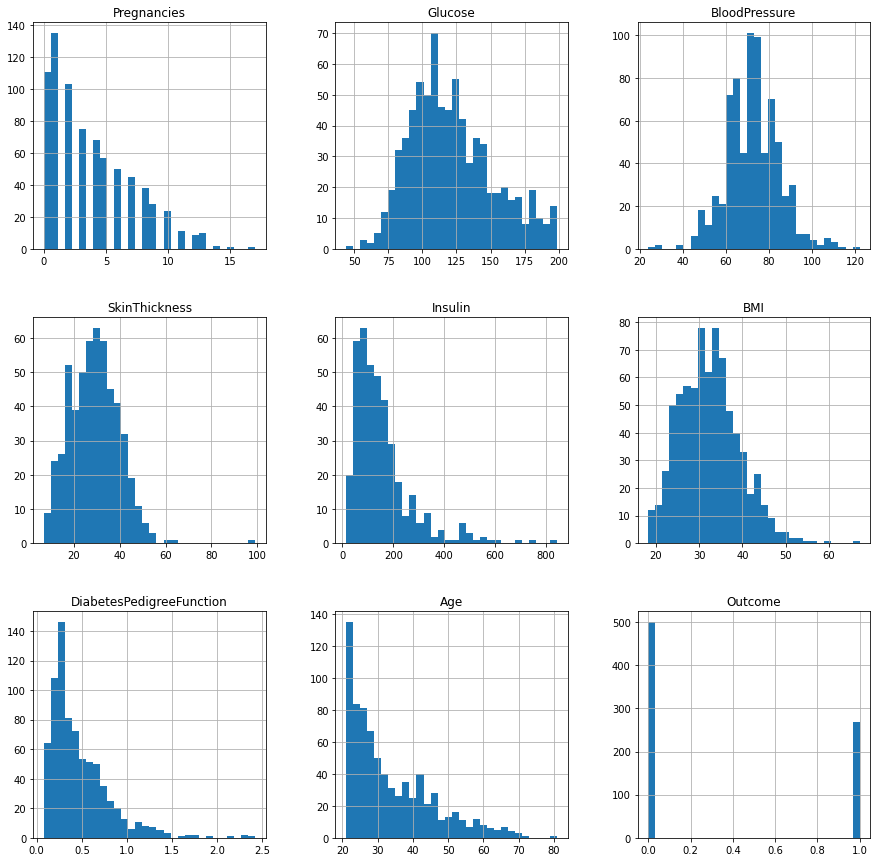

In [74]:
data.hist(bins=30,figsize = (15,15))

In [ ]:
# separating target from other features, and splitting the data

In [75]:
y=data['Outcome'].values
X=data.drop(['Outcome'],axis=1).values

In [76]:
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=8,stratify=y,shuffle=True)

In [77]:
X_train.shape

(537, 8)

In [78]:
X_test.shape

(231, 8)

In [79]:
y_train.shape

(537,)

In [80]:
y_test.shape

(231,)

In [81]:
X_train[:5]

array([[4.000e+00, 1.460e+02, 7.800e+01,       nan,       nan, 3.850e+01,
        5.200e-01, 6.700e+01],
       [7.000e+00, 1.090e+02, 8.000e+01, 3.100e+01,       nan, 3.590e+01,
        1.127e+00, 4.300e+01],
       [1.000e+00, 1.090e+02, 5.600e+01, 2.100e+01, 1.350e+02, 2.520e+01,
        8.330e-01, 2.300e+01],
       [4.000e+00, 1.100e+02, 7.600e+01, 2.000e+01, 1.000e+02, 2.840e+01,
        1.180e-01, 2.700e+01],
       [4.000e+00, 9.100e+01, 7.000e+01, 3.200e+01, 8.800e+01, 3.310e+01,
        4.460e-01, 2.200e+01]])

In [ ]:
# performing imputation

In [82]:
array_sum = np.sum(X_train)
array_has_nan = np.isnan(array_sum)
array_has_nan

True

In [83]:
imputer = SimpleImputer(missing_values = np.NAN, strategy = 'median')
imputer = imputer.fit(X_train[:,1:6])
X_train[:,1:6] = imputer.transform(X_train[:,1:6])
X_test[:,1:6]=imputer.transform(X_test[:,1:6])

In [84]:
array_sum = np.sum(X_train)
array_has_nan = np.isnan(array_sum)
array_has_nan

False

In [85]:
X_train[:5]

array([[4.000e+00, 1.460e+02, 7.800e+01, 2.900e+01, 1.220e+02, 3.850e+01,
        5.200e-01, 6.700e+01],
       [7.000e+00, 1.090e+02, 8.000e+01, 3.100e+01, 1.220e+02, 3.590e+01,
        1.127e+00, 4.300e+01],
       [1.000e+00, 1.090e+02, 5.600e+01, 2.100e+01, 1.350e+02, 2.520e+01,
        8.330e-01, 2.300e+01],
       [4.000e+00, 1.100e+02, 7.600e+01, 2.000e+01, 1.000e+02, 2.840e+01,
        1.180e-01, 2.700e+01],
       [4.000e+00, 9.100e+01, 7.000e+01, 3.200e+01, 8.800e+01, 3.310e+01,
        4.460e-01, 2.200e+01]])

In [ ]:
# standardization

In [86]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [87]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [88]:
X_train[:5]

array([[ 0.09838313,  0.81753598,  0.47285593, -0.00816572, -0.18672058,
         0.90226288,  0.13230681,  2.86954223],
       [ 1.00407011, -0.40168059,  0.63914515,  0.21670569, -0.18672058,
         0.51377815,  1.9132201 ,  0.84774799],
       [-0.80730385, -0.40168059, -1.35632547, -0.90765138, -0.04264007,
        -1.08498593,  1.05063607, -0.83708055],
       [ 0.09838313, -0.36872879,  0.30656672, -1.02008709, -0.43054914,
        -0.60685088, -1.04714482, -0.50011484],
       [ 0.09838313, -0.99481297, -0.19230094,  0.3291414 , -0.56354654,
         0.09540998, -0.08480618, -0.92132197]])

In [ ]:
# Neural networks

In [151]:
# inspired by https://towardsdatascience.com/implementing-macro-f1-score-in-keras-what-not-to-do-e9f1aa04029d
#https://medium.com/@thongonary/how-to-compute-f1-score-for-each-epoch-in-keras-a1acd17715a2
# building f1 scorer for epochs
from keras.callbacks import Callback

class F1Callback(Callback):
    def __init__(self, X_train, y_train, X_val, y_val):   
        super().__init__()
        self.X_train = X_train 
        self.y_train = y_train   
        self.X_val = X_val  
        self.y_val = y_val
        self.val_f1s = []
        self.train_f1s = []
                    
    def on_train_begin(self, logs={}):        
        self.val_f1s = []
        self.train_f1s = []
     
    def on_epoch_end(self, epoch, logs={}):
        y_val_pred = np.asarray(self.model.predict(self.X_val)).round()      
        y_train_pred = np.asarray(self.model.predict(self.X_train)).round()
    
        val_f1 = f1_score(self.y_val, y_val_pred)
        train_f1 =  f1_score(self.y_train, y_train_pred)
       
        self.val_f1s.append(val_f1)
        self.train_f1s.append(train_f1)
        print('epoch: ', len(self.val_f1s), ' val_f1:',val_f1, 'train_f1:', train_f1)

In [152]:
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train, test_size=0.3, random_state=8, stratify=y_train)

In [153]:
f1_callback = F1Callback(X_train2, y_train2, X_val, y_val)

In [154]:
def model3():
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(8, input_dim=8))
    model.add(Activation('relu'))

    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=[])
    return model

In [155]:
batch_size=len(X_train)
estimator6 = KerasClassifier(build_fn=model3, epochs=200, verbose=0, batch_size=batch_size )
history = estimator6.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

epoch:  1  val_f1: 0.5109489051094891 train_f1: 0.5431309904153354
epoch:  2  val_f1: 0.5109489051094891 train_f1: 0.5548387096774193
epoch:  3  val_f1: 0.5 train_f1: 0.5647840531561461
epoch:  4  val_f1: 0.5 train_f1: 0.5694915254237288
epoch:  5  val_f1: 0.49206349206349204 train_f1: 0.589041095890411
epoch:  6  val_f1: 0.5079365079365079 train_f1: 0.6
epoch:  7  val_f1: 0.5081967213114754 train_f1: 0.6089965397923875
epoch:  8  val_f1: 0.5081967213114754 train_f1: 0.6153846153846154
epoch:  9  val_f1: 0.5166666666666667 train_f1: 0.6126760563380281
epoch:  10  val_f1: 0.540983606557377 train_f1: 0.6192170818505338
epoch:  11  val_f1: 0.5378151260504201 train_f1: 0.6285714285714286
epoch:  12  val_f1: 0.5254237288135594 train_f1: 0.6397058823529412
epoch:  13  val_f1: 0.5128205128205129 train_f1: 0.6319702602230484
epoch:  14  val_f1: 0.5299145299145298 train_f1: 0.6515151515151516
epoch:  15  val_f1: 0.5299145299145298 train_f1: 0.6412213740458015
epoch:  16  val_f1: 0.5565217391304

epoch:  127  val_f1: 0.5882352941176471 train_f1: 0.7295081967213114
epoch:  128  val_f1: 0.5882352941176471 train_f1: 0.7346938775510204
epoch:  129  val_f1: 0.5882352941176471 train_f1: 0.7346938775510204
epoch:  130  val_f1: 0.5882352941176471 train_f1: 0.7346938775510204
epoch:  131  val_f1: 0.5882352941176471 train_f1: 0.7377049180327869
epoch:  132  val_f1: 0.5882352941176471 train_f1: 0.742857142857143
epoch:  133  val_f1: 0.5882352941176471 train_f1: 0.742857142857143
epoch:  134  val_f1: 0.5882352941176471 train_f1: 0.742857142857143
epoch:  135  val_f1: 0.5882352941176471 train_f1: 0.742857142857143
epoch:  136  val_f1: 0.6019417475728156 train_f1: 0.742857142857143
epoch:  137  val_f1: 0.6019417475728156 train_f1: 0.742857142857143
epoch:  138  val_f1: 0.6019417475728156 train_f1: 0.742857142857143
epoch:  139  val_f1: 0.6019417475728156 train_f1: 0.742857142857143
epoch:  140  val_f1: 0.6019417475728156 train_f1: 0.742857142857143
epoch:  141  val_f1: 0.6019417475728156 tra

In [ ]:
# checking learning curves

Text(0, 0.5, 'F1 score')

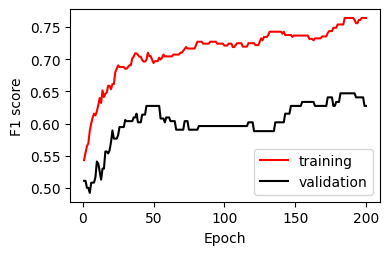

In [156]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,201))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

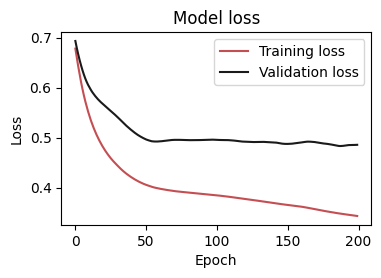

In [157]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [ ]:
# building model for checking and choosing correct hyperparameters

In [164]:
def model2(hidden_layers=1, learning_rate=0.01, width=8):
    #initializer1 = tensorflow.keras.initializers.HeNormal(seed=1)

    model = Sequential()
    model.add(Dense(width, input_dim=8))
    model.add(Activation('relu'))
    for _ in range(1, hidden_layers):
        model.add(Dense(width))
        model.add(Activation('relu'))

    model.add(Dense(1,activation ='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=[])
    return model

In [166]:
import logging
tf.get_logger().setLevel(logging.ERROR)

In [167]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [ ]:
# checking for number of hidden layers

In [170]:
estimator1 = KerasClassifier(build_fn=model2, epochs=50,  verbose=0, batch_size=len(X_train))
train_score, val_score = validation_curve(estimator1, X_train, y_train,
                                          param_name='hidden_layers', param_range=range(1,21),
                                          cv=5, scoring='f1', verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] hidden_layers=1 .................................................
[CV] . hidden_layers=1, score=(train=0.684, test=0.596), total=   0.5s
[CV] hidden_layers=2 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] . hidden_layers=2, score=(train=0.701, test=0.656), total=   0.5s
[CV] hidden_layers=3 .................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.0s remaining:    0.0s


[CV] . hidden_layers=3, score=(train=0.719, test=0.698), total=   0.6s
[CV] hidden_layers=4 .................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV] . hidden_layers=4, score=(train=0.755, test=0.590), total=   0.6s
[CV] hidden_layers=5 .................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s


[CV] . hidden_layers=5, score=(train=0.777, test=0.677), total=   0.6s
[CV] hidden_layers=6 .................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s


[CV] . hidden_layers=6, score=(train=0.741, test=0.758), total=   0.7s
[CV] hidden_layers=7 .................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.6s remaining:    0.0s


[CV] . hidden_layers=7, score=(train=0.746, test=0.667), total=   0.7s
[CV] hidden_layers=8 .................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.4s remaining:    0.0s


[CV] . hidden_layers=8, score=(train=0.812, test=0.597), total=   0.7s
[CV] hidden_layers=9 .................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    5.2s remaining:    0.0s


[CV] . hidden_layers=9, score=(train=0.810, test=0.623), total=   0.8s
[CV] hidden_layers=10 ................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    6.0s remaining:    0.0s


[CV]  hidden_layers=10, score=(train=0.793, test=0.727), total=   0.8s
[CV] hidden_layers=11 ................................................
[CV]  hidden_layers=11, score=(train=0.789, test=0.676), total=   0.9s
[CV] hidden_layers=12 ................................................
[CV]  hidden_layers=12, score=(train=0.812, test=0.623), total=   0.9s
[CV] hidden_layers=13 ................................................
[CV]  hidden_layers=13, score=(train=0.732, test=0.722), total=   1.0s
[CV] hidden_layers=14 ................................................
[CV]  hidden_layers=14, score=(train=0.803, test=0.636), total=   1.0s
[CV] hidden_layers=15 ................................................
[CV]  hidden_layers=15, score=(train=0.763, test=0.732), total=   1.0s
[CV] hidden_layers=16 ................................................
[CV]  hidden_layers=16, score=(train=0.000, test=0.000), total=   1.1s
[CV] hidden_layers=17 ................................................
[CV]  

[CV] . hidden_layers=8, score=(train=0.794, test=0.541), total=   0.8s
[CV] hidden_layers=9 .................................................
[CV] . hidden_layers=9, score=(train=0.738, test=0.617), total=   0.8s
[CV] hidden_layers=10 ................................................
[CV]  hidden_layers=10, score=(train=0.825, test=0.541), total=   0.9s
[CV] hidden_layers=11 ................................................
[CV]  hidden_layers=11, score=(train=0.796, test=0.628), total=   1.0s
[CV] hidden_layers=12 ................................................
[CV]  hidden_layers=12, score=(train=0.718, test=0.486), total=   1.0s
[CV] hidden_layers=13 ................................................
[CV]  hidden_layers=13, score=(train=0.829, test=0.608), total=   1.1s
[CV] hidden_layers=14 ................................................
[CV]  hidden_layers=14, score=(train=0.000, test=0.000), total=   1.1s
[CV] hidden_layers=15 ................................................
[CV]  

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.6min finished


Text(0, 0.5, 'F1 score')

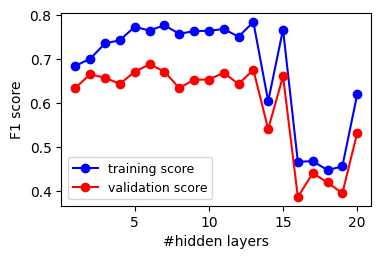

In [174]:
plt.figure(figsize=(4,2.5))
num_layers = list(range(1,21))
plt.plot(num_layers, np.mean(train_score, 1), 'o-',color='blue', label='training score')
plt.plot(num_layers, np.mean(val_score, 1),'o-', color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('#hidden layers')
plt.ylabel('F1 score')

In [ ]:
# checking for learning rate

In [172]:
estimator2 = KerasClassifier(build_fn=model2, epochs=50,  verbose=0, batch_size=len(X_train),hidden_layers=2)
learning_rates = [0.001, 0.01, 0.1]
train_score_l, val_score_l = validation_curve(estimator2, X_train, y_train,
                                          param_name='learning_rate', param_range=learning_rates,
                                          cv=5, scoring='f1', verbose=10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] learning_rate=0.001 .............................................
[CV]  learning_rate=0.001, score=(train=0.294, test=0.381), total=   0.5s
[CV] learning_rate=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=0.01, score=(train=0.705, test=0.590), total=   0.5s
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.1s remaining:    0.0s


[CV]  learning_rate=0.1, score=(train=0.833, test=0.708), total=   0.5s
[CV] learning_rate=0.001 .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.6s remaining:    0.0s


[CV]  learning_rate=0.001, score=(train=0.218, test=0.200), total=   0.5s
[CV] learning_rate=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.2s remaining:    0.0s


[CV]  learning_rate=0.01, score=(train=0.735, test=0.658), total=   0.5s
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.1, score=(train=0.774, test=0.639), total=   0.5s
[CV] learning_rate=0.001 .............................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.2s remaining:    0.0s


[CV]  learning_rate=0.001, score=(train=0.439, test=0.484), total=   0.5s
[CV] learning_rate=0.01 ..............................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    3.8s remaining:    0.0s


[CV]  learning_rate=0.01, score=(train=0.675, test=0.703), total=   0.5s
[CV] learning_rate=0.1 ...............................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.3s remaining:    0.0s


[CV]  learning_rate=0.1, score=(train=0.825, test=0.667), total=   0.5s
[CV] learning_rate=0.001 .............................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    4.8s remaining:    0.0s


[CV]  learning_rate=0.001, score=(train=0.199, test=0.091), total=   0.5s
[CV] learning_rate=0.01 ..............................................
[CV]  learning_rate=0.01, score=(train=0.748, test=0.609), total=   0.5s
[CV] learning_rate=0.1 ...............................................
[CV]  learning_rate=0.1, score=(train=0.809, test=0.571), total=   0.5s
[CV] learning_rate=0.001 .............................................
[CV]  learning_rate=0.001, score=(train=0.155, test=0.327), total=   0.5s
[CV] learning_rate=0.01 ..............................................
[CV]  learning_rate=0.01, score=(train=0.727, test=0.667), total=   0.5s
[CV] learning_rate=0.1 ...............................................
[CV]  learning_rate=0.1, score=(train=0.791, test=0.693), total=   0.5s


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    8.1s finished


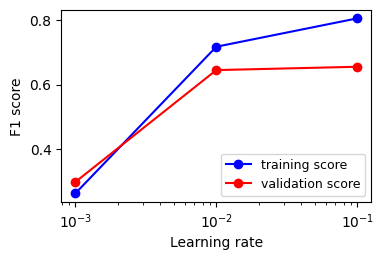

In [175]:
plt.figure(figsize=(4,2.5))
plt.plot(learning_rates, np.mean(train_score_l, 1), 'o-',color='blue', label='training score')
plt.plot(learning_rates, np.mean(val_score_l, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('Learning rate')
plt.ylabel('F1 score')
plt.xscale('log')

In [ ]:
# checking for number of nodes in each hidden layer

In [178]:
estimator3 = KerasClassifier(build_fn=model2, epochs=50,  verbose=0, hidden_layers=2, learning_rate=0.01,batch_size=len(X_train))
widths = [2, 4, 8, 16, 32, 64]
train_score_w, val_score_w = validation_curve(estimator3, X_train, y_train,
                                          param_name='width', param_range=widths,
                                          cv=5, scoring='f1', verbose=10)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] width=2 .........................................................
[CV] ......... width=2, score=(train=0.647, test=0.596), total=   0.5s
[CV] width=4 .........................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV] ......... width=4, score=(train=0.632, test=0.538), total=   0.6s
[CV] width=8 .........................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV] ......... width=8, score=(train=0.717, test=0.645), total=   0.5s
[CV] width=16 ........................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.7s remaining:    0.0s


[CV] ........ width=16, score=(train=0.752, test=0.644), total=   0.5s
[CV] width=32 ........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.3s remaining:    0.0s


[CV] ........ width=32, score=(train=0.838, test=0.719), total=   0.6s
[CV] width=64 ........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.9s remaining:    0.0s


[CV] ........ width=64, score=(train=0.909, test=0.746), total=   0.5s
[CV] width=2 .........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    3.4s remaining:    0.0s


[CV] ......... width=2, score=(train=0.000, test=0.000), total=   0.5s
[CV] width=4 .........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    4.0s remaining:    0.0s


[CV] ......... width=4, score=(train=0.639, test=0.554), total=   0.5s
[CV] width=8 .........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.5s remaining:    0.0s


[CV] ......... width=8, score=(train=0.742, test=0.603), total=   0.5s
[CV] width=16 ........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.1s remaining:    0.0s


[CV] ........ width=16, score=(train=0.792, test=0.649), total=   0.5s
[CV] width=32 ........................................................
[CV] ........ width=32, score=(train=0.840, test=0.632), total=   0.5s
[CV] width=64 ........................................................
[CV] ........ width=64, score=(train=0.906, test=0.550), total=   0.5s
[CV] width=2 .........................................................
[CV] ......... width=2, score=(train=0.000, test=0.000), total=   0.5s
[CV] width=4 .........................................................
[CV] ......... width=4, score=(train=0.669, test=0.727), total=   0.5s
[CV] width=8 .........................................................
[CV] ......... width=8, score=(train=0.713, test=0.723), total=   0.5s
[CV] width=16 ........................................................
[CV] ........ width=16, score=(train=0.712, test=0.691), total=   0.5s
[CV] width=32 ........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   16.4s finished


Text(0, 0.5, 'score')

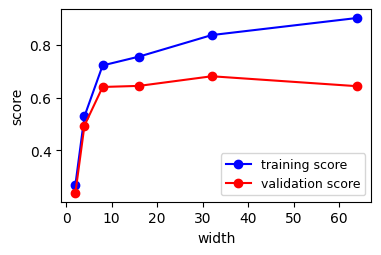

In [179]:
plt.figure(figsize=(4,2.5))
plt.plot(widths, np.mean(train_score_w, 1), 'o-',color='blue', label='training score')
plt.plot(widths, np.mean(val_score_w, 1), 'o-',color='red', label='validation score')
plt.legend(loc='best', fontsize =9)
plt.xlabel('width')
plt.ylabel('score')

In [182]:
train_sizes = [50,100,200,300,429]

In [ ]:
# checking performance of the initial model

In [541]:
estimator_first = KerasClassifier(build_fn=model2, epochs=200,  verbose=0, batch_size=len(X_train),hidden_layers=2,width=10,learning_rate=0.01)

In [545]:
train_sizes_nn1, training_scores_nn_f1_1, validation_scores_nn_f1_1,fit_times_nn_1, _ = learning_curve(estimator_first, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [546]:
train_scores_mean_nn1 = np.mean(training_scores_nn_f1_1,axis = 1)
validation_scores_mean_nn1 = np.mean(validation_scores_nn_f1_1, axis = 1 )
train_scores_std_nn1 = np.std(training_scores_nn_f1_1,axis = 1)
validation_scores_std_nn1 = np.std(validation_scores_nn_f1_1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn1, index = train_sizes_nn1))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn1, index = train_sizes_nn1))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn1, index = train_sizes_nn1))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn1, index = train_sizes_nn1))

Mean training scores

 50     0.986667
100    1.000000
200    0.976810
300    0.941168
429    0.883952
dtype: float64

 --------------------
Mean validation scores

 50     0.538763
100    0.609588
200    0.587721
300    0.618376
429    0.613240
dtype: float64

 --------------------
Std training scores

 50     0.026667
100    0.000000
200    0.014446
300    0.014687
429    0.014855
dtype: float64

 --------------------
Std validation scores

 50     0.089164
100    0.030987
200    0.073487
300    0.114827
429    0.096489
dtype: float64


(0.4, 1.0)

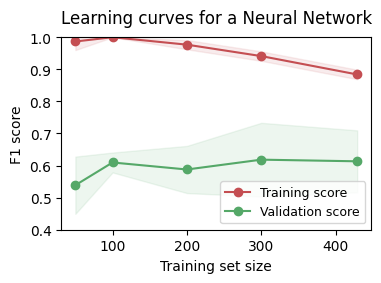

In [547]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn1, train_scores_mean_nn1 - train_scores_std_nn1 , train_scores_mean_nn1 + train_scores_std_nn1 , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn1, validation_scores_mean_nn1 - validation_scores_std_nn1 , validation_scores_mean_nn1+ validation_scores_std_nn1 , alpha=0.1, color="g")
plt.plot(train_sizes_nn1, train_scores_mean_nn1, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn1, validation_scores_mean_nn1, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0.4,1)

In [563]:
history = estimator_first.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

epoch:  1  val_f1: 0.3880597014925373 train_f1: 0.38283828382838286
epoch:  2  val_f1: 0.4166666666666667 train_f1: 0.4332129963898917
epoch:  3  val_f1: 0.4642857142857143 train_f1: 0.4761904761904762
epoch:  4  val_f1: 0.4948453608247423 train_f1: 0.5040650406504065
epoch:  5  val_f1: 0.4842105263157895 train_f1: 0.5485232067510548
epoch:  6  val_f1: 0.5106382978723404 train_f1: 0.5462555066079295
epoch:  7  val_f1: 0.48936170212765956 train_f1: 0.5765765765765766
epoch:  8  val_f1: 0.49462365591397844 train_f1: 0.6272727272727273
epoch:  9  val_f1: 0.49462365591397844 train_f1: 0.6301369863013698
epoch:  10  val_f1: 0.5106382978723404 train_f1: 0.6486486486486487
epoch:  11  val_f1: 0.5263157894736842 train_f1: 0.6517857142857142
epoch:  12  val_f1: 0.5416666666666667 train_f1: 0.6367713004484306
epoch:  13  val_f1: 0.5531914893617021 train_f1: 0.6306306306306306
epoch:  14  val_f1: 0.5531914893617021 train_f1: 0.6244343891402715
epoch:  15  val_f1: 0.5531914893617021 train_f1: 0.63

epoch:  127  val_f1: 0.6476190476190475 train_f1: 0.7968749999999999
epoch:  128  val_f1: 0.6476190476190475 train_f1: 0.7968749999999999
epoch:  129  val_f1: 0.6476190476190475 train_f1: 0.7968749999999999
epoch:  130  val_f1: 0.6476190476190475 train_f1: 0.7968749999999999
epoch:  131  val_f1: 0.6415094339622641 train_f1: 0.8015564202334631
epoch:  132  val_f1: 0.6415094339622641 train_f1: 0.8015564202334631
epoch:  133  val_f1: 0.6415094339622641 train_f1: 0.8015564202334631
epoch:  134  val_f1: 0.6415094339622641 train_f1: 0.8015564202334631
epoch:  135  val_f1: 0.6415094339622641 train_f1: 0.7984496124031008
epoch:  136  val_f1: 0.6355140186915887 train_f1: 0.7984496124031008
epoch:  137  val_f1: 0.6296296296296297 train_f1: 0.7953667953667953
epoch:  138  val_f1: 0.6296296296296297 train_f1: 0.7999999999999999
epoch:  139  val_f1: 0.6296296296296297 train_f1: 0.7999999999999999
epoch:  140  val_f1: 0.6296296296296297 train_f1: 0.7999999999999999
epoch:  141  val_f1: 0.62962962962

Text(0, 0.5, 'F1 score')

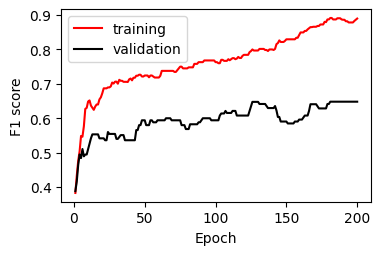

In [564]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,201))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

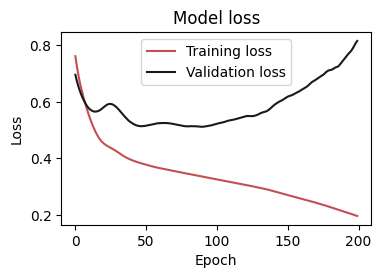

In [565]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [ ]:
# checking performance of the final model

In [706]:
estimator_final = KerasClassifier(build_fn=model2, epochs=50,  verbose=0, hidden_layers=2, width=10, learning_rate=0.01,batch_size=len(X_train))

In [707]:
train_sizes_nn, training_scores_nn_f1, validation_scores_nn_f1,fit_times_nn, _ = learning_curve(estimator_final, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [708]:
train_scores_mean_nn = np.mean(training_scores_nn_f1,axis = 1)
validation_scores_mean_nn = np.mean(validation_scores_nn_f1, axis = 1 )
train_scores_std_nn = np.std(training_scores_nn_f1,axis = 1)
validation_scores_std_nn = np.std(validation_scores_nn_f1, axis = 1 )

print('Mean training scores\n\n', pd.Series(train_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_nn, index = train_sizes_nn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_nn, index = train_sizes_nn))

Mean training scores

 50     0.876070
100    0.862044
200    0.811013
300    0.724230
429    0.720033
dtype: float64

 --------------------
Mean validation scores

 50     0.568430
100    0.648499
200    0.658335
300    0.632835
429    0.654818
dtype: float64

 --------------------
Std training scores

 50     0.098218
100    0.021241
200    0.024273
300    0.035962
429    0.030042
dtype: float64

 --------------------
Std validation scores

 50     0.128594
100    0.034102
200    0.083385
300    0.069864
429    0.032246
dtype: float64


(0.4, 1.0)

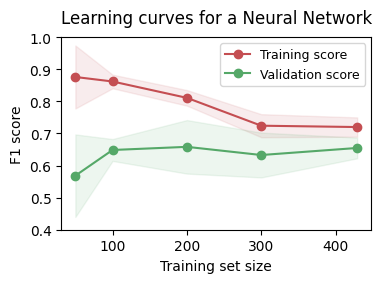

In [709]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn , train_scores_mean_nn + train_scores_std_nn , alpha=0.1, color="r")
plt.fill_between(train_sizes_nn, validation_scores_mean_nn - validation_scores_std_nn , validation_scores_mean_nn+ validation_scores_std_nn , alpha=0.1, color="g")
plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_nn, validation_scores_mean_nn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a Neural Network', fontsize = 12, y = 1.03)
plt.legend(fontsize = 9)
plt.ylim(0.4,1)

In [756]:
history = estimator_final.fit(X_train2, y_train2, callbacks=f1_callback,validation_data=(X_val,y_val))

epoch:  1  val_f1: 0.0 train_f1: 0.03007518796992481
epoch:  2  val_f1: 0.03508771929824561 train_f1: 0.03007518796992481
epoch:  3  val_f1: 0.06779661016949153 train_f1: 0.0583941605839416
epoch:  4  val_f1: 0.15873015873015872 train_f1: 0.09999999999999999
epoch:  5  val_f1: 0.17647058823529413 train_f1: 0.1780821917808219
epoch:  6  val_f1: 0.2368421052631579 train_f1: 0.24050632911392403
epoch:  7  val_f1: 0.32098765432098764 train_f1: 0.4111111111111111
epoch:  8  val_f1: 0.3908045977011494 train_f1: 0.455958549222798
epoch:  9  val_f1: 0.47311827956989244 train_f1: 0.502415458937198
epoch:  10  val_f1: 0.5490196078431373 train_f1: 0.5495495495495495
epoch:  11  val_f1: 0.5576923076923077 train_f1: 0.5726872246696035
epoch:  12  val_f1: 0.5794392523364487 train_f1: 0.6101694915254237
epoch:  13  val_f1: 0.5925925925925927 train_f1: 0.6422764227642276
epoch:  14  val_f1: 0.6126126126126126 train_f1: 0.6639999999999999
epoch:  15  val_f1: 0.6071428571428571 train_f1: 0.6719367588932

Text(0, 0.5, 'F1 score')

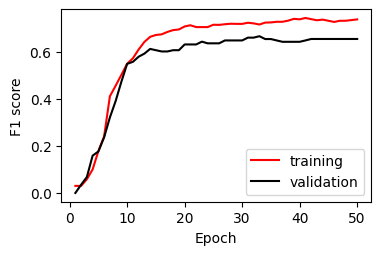

In [757]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
num_epochs = list(range(1,51))
plt.plot(num_epochs, f1_callback.train_f1s, color='red', label='training')
plt.plot(num_epochs, f1_callback.val_f1s, color='black', label='validation')
plt.legend(loc='best')
plt.xlabel('Epoch')
plt.ylabel('F1 score')

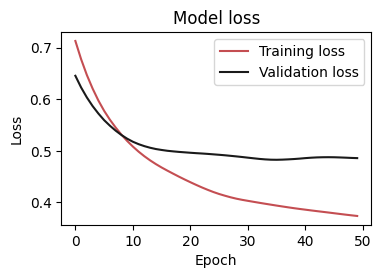

In [758]:
plt.figure(figsize=(4,2.5))
plt.plot(history.history['loss'],color='r', label="Training loss")
plt.plot(history.history['val_loss'], color='k', label="Validation loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend( loc='best')
plt.show()

In [ ]:
# checking the final neural network model on test set and measuring the performance

In [710]:
start = time.time()
estimator_final.fit(X_train,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.381147s


In [711]:
start = time.time()
y_pred_nn=estimator_final.predict(X_test)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.065262s


Text(-7.75, 0.5, 'True label')

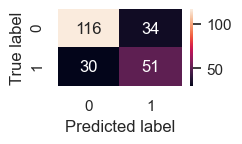

In [712]:
plt.figure(figsize=(2,1))
matrix=confusion_matrix(y_test,y_pred_nn)
sns.set(font_scale=1)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [713]:
precision_scorer(estimator_final, X_test,y_test)

0.6

In [714]:
recall_scorer(estimator_final, X_test,y_test)

0.6296296296296297

In [715]:
f1_scorer(estimator_final, X_test,y_test)

0.6144578313253012

In [716]:
accuracy_scorer(estimator_final, X_test,y_test)

0.7229437229437229

In [717]:
roc_auc_scorer(estimator_final, X_test,y_test)

0.7786831275720164

In [ ]:
#decision trees

In [ ]:
# base model

In [308]:
dt = DecisionTreeClassifier(random_state=21)

In [343]:
dt.fit(X_train, y_train)
dt.tree_.max_depth

13

In [309]:
accuracy_score_dt = np.mean(cross_val_score(dt,X_train, y_train, scoring ='accuracy' , cv=5))
accuracy_score_dt

0.6963136033229491

In [310]:
precision_score_dt = np.mean(cross_val_score(dt,X_train, y_train, scoring ='precision' , cv=5))
precision_score_dt

0.554224318800474

In [311]:
recall_score_dt = np.mean(cross_val_score(dt,X_train, y_train, scoring ='recall' , cv=5))
recall_score_dt

0.5706970128022759

In [312]:
roc_auc_score_dt=np.mean(cross_val_score(dt,X_train, y_train, scoring ='roc_auc' , cv=5))
roc_auc_score_dt

0.6667770778297093

In [313]:
f1_dt=np.mean(cross_val_score(dt,X_train, y_train, scoring ='f1' , cv=5))
f1_dt

0.557913098809045

In [ ]:
# checking performance of the base model with learning curve

In [763]:
dt = DecisionTreeClassifier(random_state=21)

In [318]:
train_sizes_dt, training_scores_dt, validation_scores_dt,fit_times_dt, _ = learning_curve(dt, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [319]:
train_scores_mean_dt = np.mean(training_scores_dt,axis = 1)
validation_scores_mean_dt = np.mean(validation_scores_dt, axis = 1 )
fit_times_mean_dt=np.mean(fit_times_dt,axis=1)
train_scores_std_dt = np.std(training_scores_dt,axis = 1)
validation_scores_std_dt = np.std(validation_scores_dt, axis = 1 )
fit_times_std_dt=np.std(fit_times_dt,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_dt, index = train_sizes_dt))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_dt, index = train_sizes_dt))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_dt, index=train_sizes_dt))
print('\n', '-' * 20) # separator
print('Std training scores\n\n', pd.Series(train_scores_std_dt, index = train_sizes_dt))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_dt, index = train_sizes_dt))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_dt, index=train_sizes_dt))

Mean training scores

 50     1.0
100    1.0
200    1.0
300    1.0
429    1.0
dtype: float64

 --------------------
Mean validation scores

 50     0.576506
100    0.577099
200    0.628149
300    0.564257
429    0.549846
dtype: float64

 --------------------
fit time

 50     0.000756
100    0.000896
200    0.001245
300    0.001445
429    0.001900
dtype: float64

 --------------------
Std training scores

 50     0.0
100    0.0
200    0.0
300    0.0
429    0.0
dtype: float64

 --------------------
Std validation scores

 50     0.108219
100    0.042054
200    0.072501
300    0.060705
429    0.116594
dtype: float64

 --------------------
fit time

 50     0.000163
100    0.000063
200    0.000197
300    0.000084
429    0.000185
dtype: float64


(0.3, 1.0)

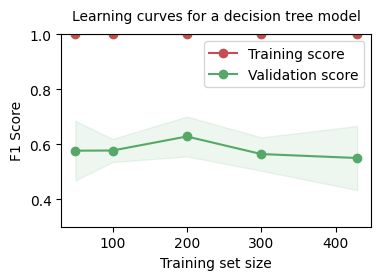

In [327]:
plt.figure(figsize=(4,2.5))
plt.style.use('default')
plt.fill_between(train_sizes_dt, train_scores_mean_dt - train_scores_std_dt, train_scores_mean_dt + train_scores_std_dt, alpha=0.1, color="r")
plt.fill_between(train_sizes_dt, validation_scores_mean_dt - validation_scores_std_dt, validation_scores_mean_dt + validation_scores_std_dt, alpha=0.1, color="g")
plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', color="r", label="Training score")
plt.plot(train_sizes_dt, validation_scores_mean_dt, 'o-', color="g", label="Validation score")
plt.ylabel('F1 Score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a decision tree model', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.3,1)

In [ ]:
# checking for best ccp_alpha value with coarse grid search and model complexity curve (post-pruning)

In [321]:
param_grid = {'ccp_alpha':[0,0.001,0.01,0.05,0.1,0.5,1]}


# Create a basic model
dt2 =  DecisionTreeClassifier(random_state=21)
# Instantiate the grid search model
dt_grid2 = GridSearchCV(estimator = dt2, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
dt_grid2.fit(X_train, y_train)
print(dt_grid2.best_params_)
score=dt_grid2.best_score_
print("f1: %s" % '{:.2%}'.format(score))

{'ccp_alpha': 0.01}
f1: 64.79%


/Users/vrastogi/.pyenv/versions/3.7.6/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass param_name=ccp_alpha, param_range=[0.001, 0.002, 0.004, 0.006, 0.008, 0.01, 0.02, 0.04] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0, 0.5, 'f1 score')

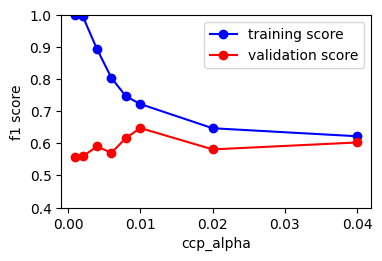

In [323]:
plt.figure(figsize=(4,2.5))
ccp_alpha = [0.001,0.002,0.004,0.006,0.008,0.01, 0.02,0.04]
dt3 =  DecisionTreeClassifier(random_state=21)
train_score, val_score = validation_curve(dt3,X_train, y_train,
                                          'ccp_alpha', ccp_alpha, cv=5, scoring='f1')

plt.plot(ccp_alpha, np.mean(train_score, axis=1),'o-', color='blue', label='training score')
plt.plot(ccp_alpha, np.mean(val_score, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.4, 1)
plt.xlabel('ccp_alpha')
plt.ylabel('f1 score')

In [ ]:
# building decision tree with chosen ccp_alpha and checking its performance with learning curve

In [324]:
dt4 = DecisionTreeClassifier(random_state=21, ccp_alpha=0.01)

In [325]:
train_sizes_dt4, training_scores_dt4, validation_scores_dt4,fit_times_dt4, _ = learning_curve(dt4, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [326]:
train_scores_mean_dt4 = np.mean(training_scores_dt4,axis = 1)
validation_scores_mean_dt4 = np.mean(validation_scores_dt4, axis = 1 )
fit_times_mean_dt4=np.mean(fit_times_dt4,axis=1)
train_scores_std_dt4 = np.std(training_scores_dt4,axis = 1)
validation_scores_std_dt4 = np.std(validation_scores_dt4, axis = 1 )
fit_times_std_dt4=np.std(fit_times_dt4,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_dt4, index = train_sizes_dt4))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_dt4, index = train_sizes_dt4))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_dt4, index=train_sizes_dt4))
print('\n', '-' * 20) # separator
print('Std training scores\n\n', pd.Series(train_scores_std_dt4, index = train_sizes_dt4))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_dt4, index = train_sizes_dt4))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_dt4, index=train_sizes_dt4))

Mean training scores

 50     1.000000
100    0.980164
200    0.874082
300    0.769727
429    0.723310
dtype: float64

 --------------------
Mean validation scores

 50     0.576506
100    0.590048
200    0.656770
300    0.611233
429    0.654826
dtype: float64

 --------------------
fit time

 50     0.000962
100    0.000961
200    0.001257
300    0.001559
429    0.002084
dtype: float64

 --------------------
Std training scores

 50     0.000000
100    0.016421
200    0.033925
300    0.019438
429    0.055197
dtype: float64

 --------------------
Std validation scores

 50     0.108219
100    0.051702
200    0.057538
300    0.040476
429    0.058334
dtype: float64

 --------------------
fit time

 50     0.000138
100    0.000040
200    0.000096
300    0.000127
429    0.000188
dtype: float64


(0.3, 1.0)

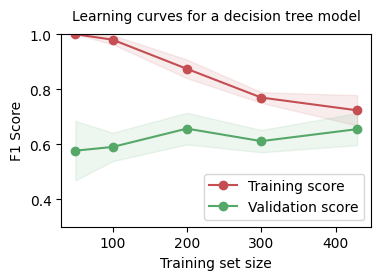

In [464]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_dt4, train_scores_mean_dt4 - train_scores_std_dt4, train_scores_mean_dt4 + train_scores_std_dt4, alpha=0.1, color="r")
plt.fill_between(train_sizes_dt4, validation_scores_mean_dt4 - validation_scores_std_dt4, validation_scores_mean_dt4 + validation_scores_std_dt4, alpha=0.1, color="g")
plt.plot(train_sizes_dt4, train_scores_mean_dt4, 'o-', color="r", label="Training score")
plt.plot(train_sizes_dt4, validation_scores_mean_dt4, 'o-', color="g", label="Validation score")
plt.ylabel('F1 Score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for a decision tree model', fontsize = 10, y = 1.03)
plt.legend(loc='lower right')
plt.ylim(0.3,1)

In [ ]:
# checking performance of the final decision tree on test set

In [329]:
start = time.time()
dt4.fit(X_train,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.003252s


In [341]:
dt4.tree_.max_depth

4

In [330]:
start = time.time()
y_pred_dt=dt4.predict(X_test)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.000488s


Text(-7.75, 0.5, 'True label')

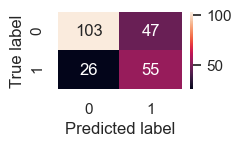

In [335]:
plt.figure(figsize=(2,1))
sns.set(font_scale=1)
matrix=confusion_matrix(y_test,y_pred_dt)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [336]:
precision_scorer(dt4, X_test,y_test)

0.5392156862745098

In [337]:
recall_scorer(dt4, X_test,y_test)

0.6790123456790124

In [338]:
f1_scorer(dt4, X_test,y_test)

0.6010928961748634

In [339]:
roc_auc_scorer(dt4, X_test,y_test)

0.7124691358024692

In [340]:
accuracy_scorer (dt4, X_test,y_test)

0.683982683982684

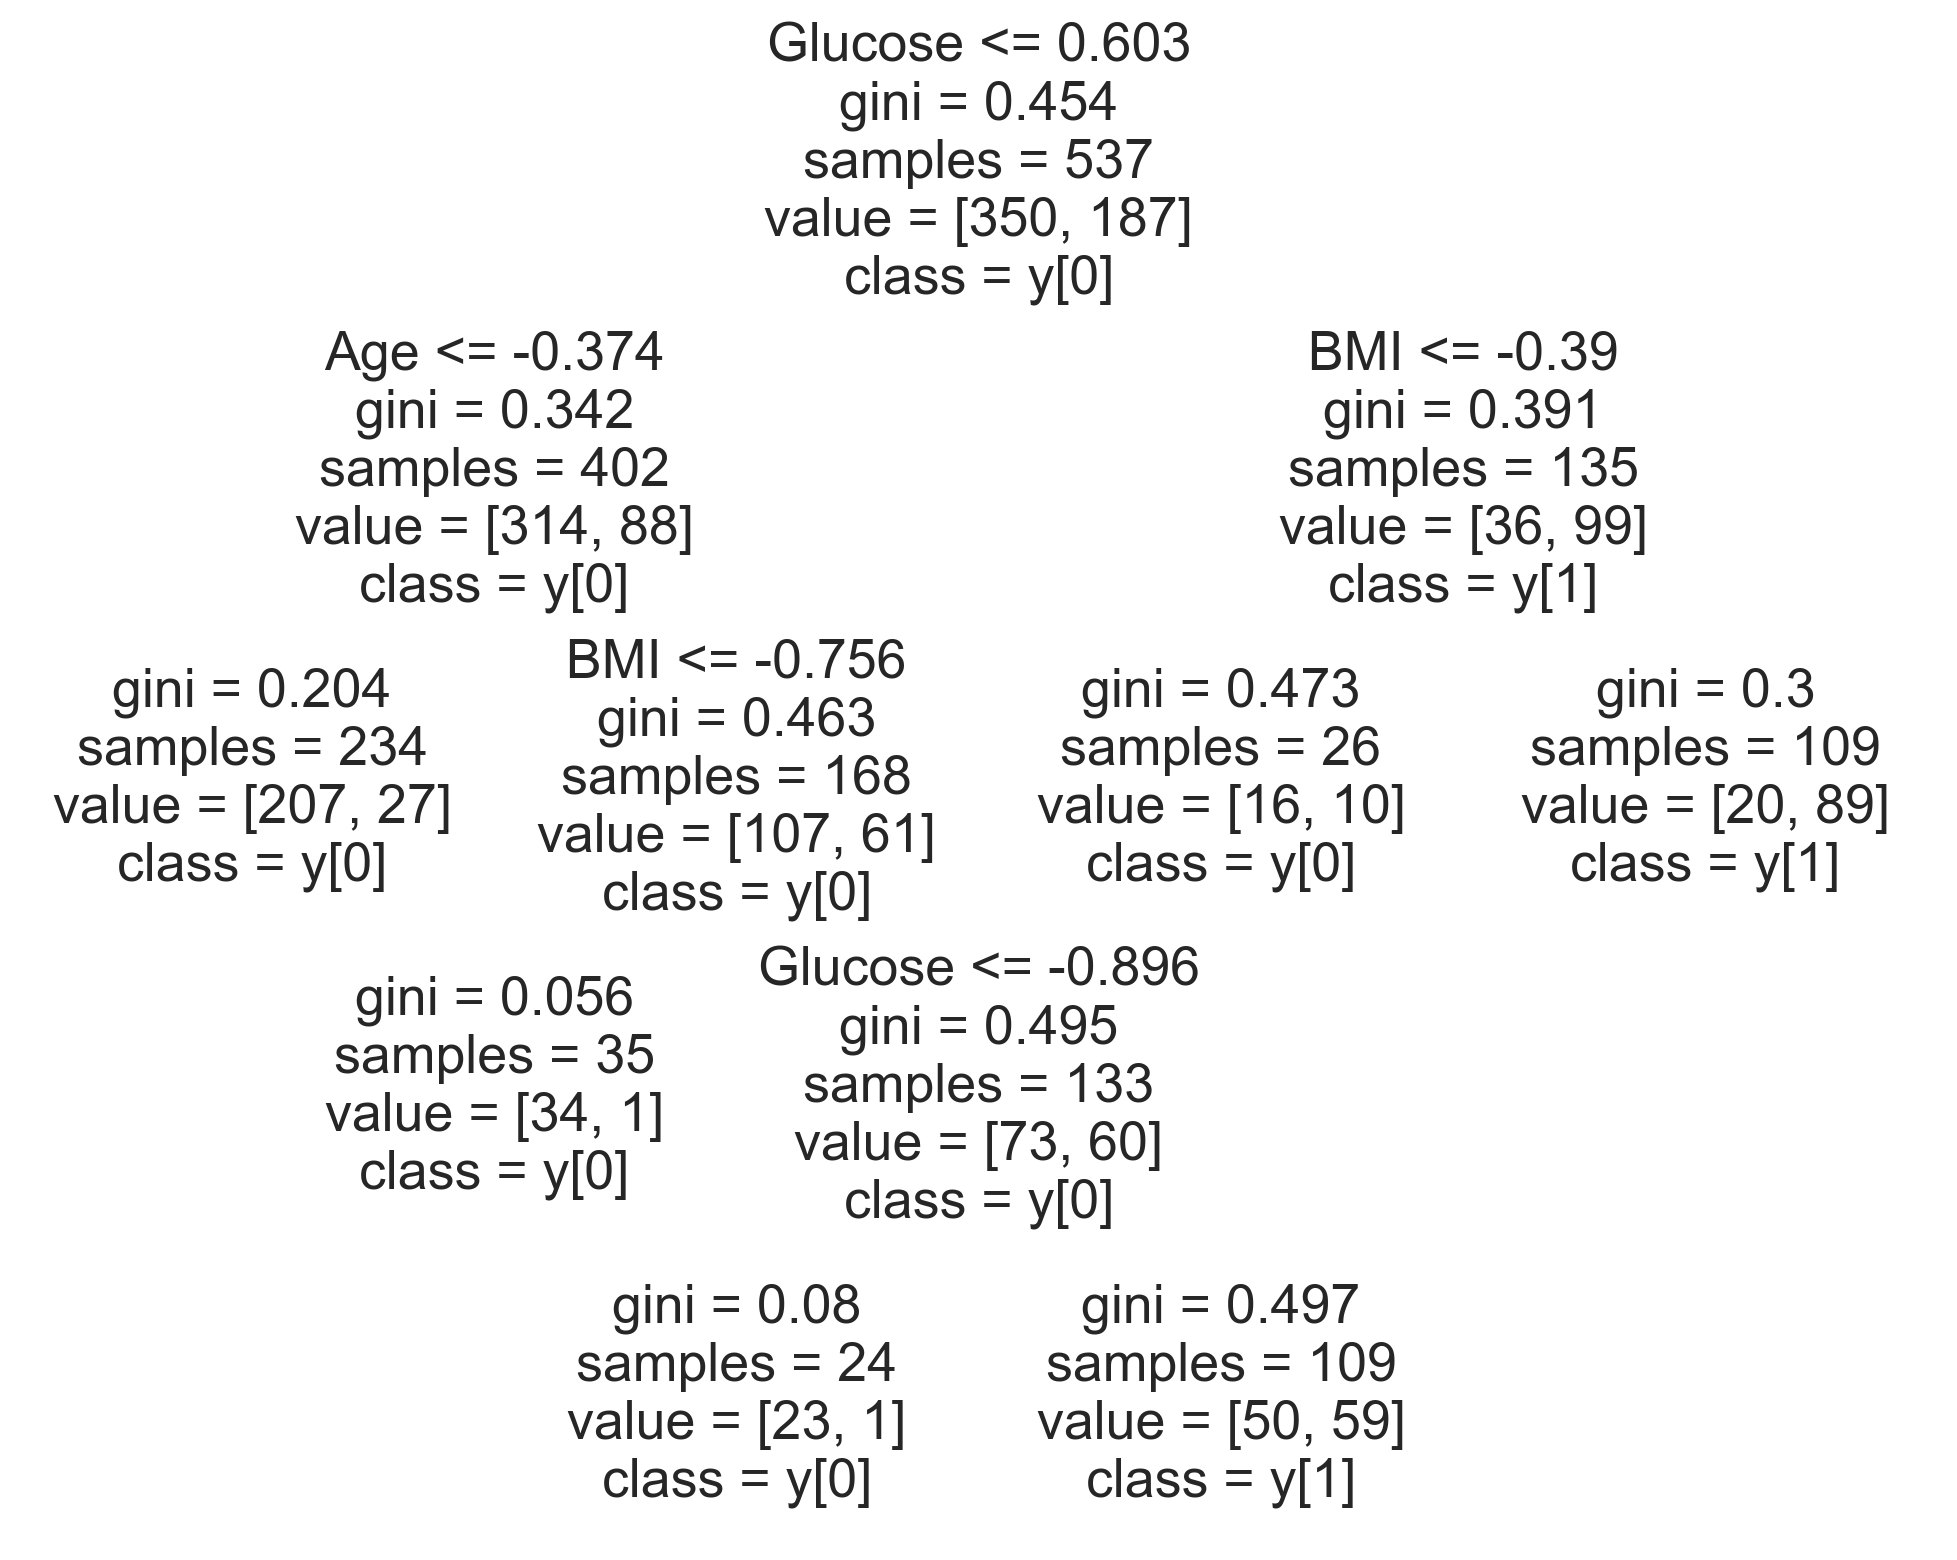

In [385]:
fig = plt.figure(figsize=(25,20))
_=tree.plot_tree(dt4, class_names=True,feature_names= data.columns)  

In [ ]:
#knn 

In [ ]:
# knn base model

In [349]:
knn = KNeighborsClassifier()

In [350]:
accuracy_score_knn = np.mean(cross_val_score(knn,X_train, y_train, scoring ='accuracy' , cv=5))
accuracy_score_knn

0.7338006230529596

In [351]:
precision_score_knn = np.mean(cross_val_score(knn,X_train, y_train, scoring ='precision' , cv=5))
precision_score_knn

0.6345985869327183

In [352]:
recall_score_knn = np.mean(cross_val_score(knn,X_train, y_train, scoring ='recall' , cv=5))
recall_score_knn

0.5773826458036984

In [353]:
f1_knn=np.mean(cross_val_score(knn,X_train, y_train, scoring ='f1' , cv=5))
f1_knn

0.6009397596354118

In [354]:
roc_auc_score_knn=np.mean(cross_val_score(knn,X_train, y_train, scoring ='roc_auc' , cv=5))
roc_auc_score_knn

0.8036882747409064

In [ ]:
# checking performance of base knn model using learning curve

In [356]:
train_sizes_knn, training_scores_knn, validation_scores_knn, fit_times_knn, _ = learning_curve(knn, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True, random_state=8)

In [360]:
train_scores_mean_knn = np.mean(training_scores_knn,axis = 1)
validation_scores_mean_knn = np.mean(validation_scores_knn, axis = 1 )
train_scores_std_knn = np.std(training_scores_knn,axis = 1)
validation_scores_std_knn = np.std(validation_scores_knn, axis = 1 )
fit_times_mean_knn=np.mean(fit_times_knn,axis=1)
fit_times_std_knn=np.std(fit_times_knn,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_knn, index = train_sizes_knn))
print('\n', '-' * 20) # separator 
print('Mean validation scores\n\n', pd.Series(validation_scores_mean_knn, index = train_sizes_knn))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_knn, index = train_sizes_knn))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_knn, index = train_sizes_knn))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_knn, index=train_sizes_knn))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_knn, index=train_sizes_knn))

Mean training scores

 50     0.680782
100    0.761334
200    0.747083
300    0.728166
429    0.776124
dtype: float64

 --------------------
Mean validation scores

 50     0.520585
100    0.608319
200    0.624310
300    0.640564
429    0.600940
dtype: float64

 --------------------
Std training scores

 50     0.080712
100    0.042535
200    0.054223
300    0.023177
429    0.009973
dtype: float64

 --------------------
Std validation scores

 50     0.173450
100    0.070430
200    0.063104
300    0.052610
429    0.026784
dtype: float64

 --------------------
fit time

 50     0.000518
100    0.000595
200    0.000519
300    0.000572
429    0.000641
dtype: float64

 --------------------
fit time

 50     0.000089
100    0.000125
200    0.000033
300    0.000062
429    0.000067
dtype: float64


(0.3, 1.0)

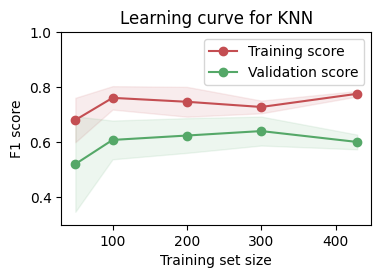

In [371]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn, train_scores_mean_knn + train_scores_std_knn, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn, validation_scores_mean_knn- validation_scores_std_knn  , validation_scores_mean_knn+ validation_scores_std_knn , alpha=0.1, color="g")
plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn, validation_scores_mean_knn, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curve for KNN')
plt.legend(loc='best')
plt.ylim(0.3,1)

In [ ]:
# checking for best number of neighbors using coarse grid search and model complexity curve

In [364]:
n_neighbors_1 = [1,5,10,15,20,30,40,50,60,70,80,90,100]
train_scoreknn, val_scoreknn = validation_curve(knn,X_train, y_train,
                                          'n_neighbors', n_neighbors_1, cv=5, scoring='f1', n_jobs=-1)


/Users/vrastogi/.pyenv/versions/3.7.6/envs/ml/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass param_name=n_neighbors, param_range=[1, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0, 0.5, 'f1 score')

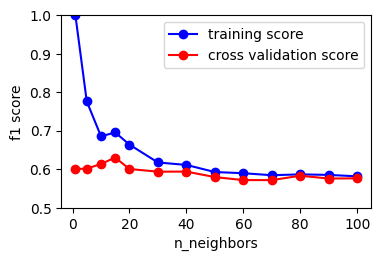

In [365]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.plot(n_neighbors_1, np.mean(train_scoreknn, axis=1),'o-', color='blue', label='training score')
plt.plot(n_neighbors_1, np.mean(val_scoreknn, axis=1), 'o-',color='red', label='cross validation score')
plt.legend(loc='best')
plt.ylim(0.5, 1)
plt.xlabel('n_neighbors')
plt.ylabel('f1 score')

In [ ]:
# building and checking performance of knn (with k=15) using learning curve

In [366]:
knn2 = KNeighborsClassifier(n_neighbors=15)

In [368]:
train_sizes_knn2, training_scores_knn2, validation_scores_knn2, fit_times_knn2, _ = learning_curve(knn2, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True, random_state=8)

In [369]:
train_scores_mean_knn2 = np.mean(training_scores_knn2,axis = 1)
validation_scores_mean_knn2 = np.mean(validation_scores_knn2, axis = 1 )
train_scores_std_knn2 = np.std(training_scores_knn2,axis = 1)
validation_scores_std_knn2 = np.std(validation_scores_knn2, axis = 1 )
fit_times_mean_knn2=np.mean(fit_times_knn2,axis=1)
fit_times_std_knn2=np.std(fit_times_knn2,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_knn2, index = train_sizes_knn2))
print('\n', '-' * 20) # separator 
print('Mean validation scores\n\n', pd.Series(validation_scores_mean_knn2, index = train_sizes_knn2))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_knn2, index = train_sizes_knn2))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_knn2, index = train_sizes_knn2))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_knn2, index=train_sizes_knn2))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_knn2, index=train_sizes_knn2))

Mean training scores

 50     0.491701
100    0.645595
200    0.685223
300    0.676355
429    0.695283
dtype: float64

 --------------------
Mean validation scores

 50     0.537770
100    0.609360
200    0.623743
300    0.622443
429    0.629857
dtype: float64

 --------------------
Std training scores

 50     0.227512
100    0.087899
200    0.042986
300    0.043594
429    0.013726
dtype: float64

 --------------------
Std validation scores

 50     0.109988
100    0.064787
200    0.076682
300    0.080298
429    0.054818
dtype: float64

 --------------------
fit time

 50     0.000657
100    0.000498
200    0.000516
300    0.000618
429    0.000639
dtype: float64

 --------------------
fit time

 50     0.000095
100    0.000057
200    0.000053
300    0.000094
429    0.000031
dtype: float64


(0.3, 1.0)

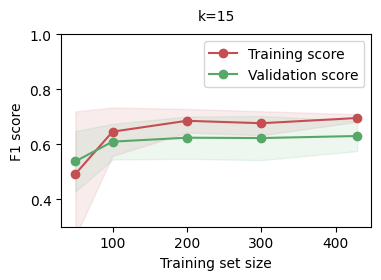

In [372]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_knn2, train_scores_mean_knn2 - train_scores_std_knn2, train_scores_mean_knn2 + train_scores_std_knn2, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn2, validation_scores_mean_knn2- validation_scores_std_knn2  , validation_scores_mean_knn2+ validation_scores_std_knn2 , alpha=0.1, color="g")
plt.plot(train_sizes_knn2, train_scores_mean_knn2, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn2, validation_scores_mean_knn2, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('k=15', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.3,1)

In [ ]:
# checking performance of final knn on test set

In [373]:
start = time.time()
knn2.fit(X_train,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.001376s


In [374]:
start = time.time()
y_pred_knn=knn2.predict(X_test)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.011615s


Text(-7.75, 0.5, 'True label')

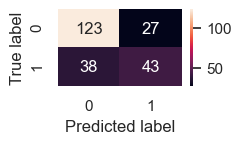

In [376]:
plt.figure(figsize=(2,1))
sns.set(font_scale=1)
matrix=confusion_matrix(y_test,y_pred_knn)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [377]:
precision_scorer(knn2, X_test,y_test)

0.6142857142857143

In [378]:
recall_scorer(knn2, X_test,y_test)

0.5308641975308642

In [379]:
f1_scorer(knn2, X_test,y_test)

0.5695364238410596

In [380]:
roc_auc_scorer(knn2, X_test,y_test)

0.7879012345679011

In [381]:
accuracy_scorer (knn2, X_test,y_test)

0.7186147186147186

In [ ]:
# also, checked knn with manhattan distance, but it did not lead to better results

In [466]:
knn3= KNeighborsClassifier(p=1)
train_sizes_knn3, training_scores_knn3, validation_scores_knn3, fit_times_knn3, _ = learning_curve(knn3, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [467]:
train_scores_mean_knn3 = np.mean(training_scores_knn3,axis = 1)
validation_scores_mean_knn3 = np.mean(validation_scores_knn3, axis = 1 )
train_scores_std_knn3 = np.std(training_scores_knn3,axis = 1)
validation_scores_std_knn3 = np.std(validation_scores_knn3, axis = 1 )
fit_times_mean_knn3=np.mean(fit_times_knn3,axis=1)
fit_times_std_knn3=np.std(fit_times_knn3,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_knn3, index = train_sizes_knn3))
print('\n', '-' * 20) # separator 
print('Mean training scores\n\n', pd.Series(validation_scores_mean_knn3, index = train_sizes_knn3))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_knn3, index = train_sizes_knn3))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_knn3, index = train_sizes_knn3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_knn3, index=train_sizes_knn3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_knn3, index=train_sizes_knn3))

Mean training scores

 50     0.720534
100    0.753319
200    0.741672
300    0.763988
429    0.759586
dtype: float64

 --------------------
Mean training scores

 50     0.569939
100    0.631235
200    0.606313
300    0.632036
429    0.585859
dtype: float64

 --------------------
Std training scores

 50     0.128965
100    0.054233
200    0.051281
300    0.017253
429    0.015014
dtype: float64

 --------------------
Std validation scores

 50     0.088713
100    0.048819
200    0.055341
300    0.055402
429    0.048424
dtype: float64

 --------------------
fit time

 50     0.000788
100    0.000557
200    0.000535
300    0.000674
429    0.000743
dtype: float64

 --------------------
fit time

 50     0.000204
100    0.000073
200    0.000058
300    0.000035
429    0.000079
dtype: float64


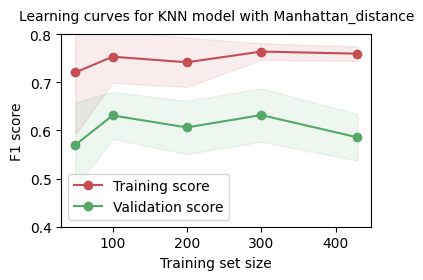

In [468]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_knn3, train_scores_mean_knn3 - train_scores_std_knn3, train_scores_mean_knn3 + train_scores_std_knn3, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn3, validation_scores_mean_knn3- validation_scores_std_knn3  , validation_scores_mean_knn3+ validation_scores_std_knn3 , alpha=0.1, color="g")
plt.plot(train_sizes_knn3, train_scores_mean_knn3, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn3, validation_scores_mean_knn3, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for KNN model with Manhattan_distance', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.4,.8)
plt.legend(loc='best')

In [470]:
n_neighbors_k3 = [1,5,10,15,20,30,40,50,60,70,80,90,100]
train_score_k3, val_score_k3 = validation_curve(knn3,X_train, y_train,
                                          param_name='n_neighbors', param_range=n_neighbors_k3, cv=5, scoring='f1')

Text(0, 0.5, 'F1 score')

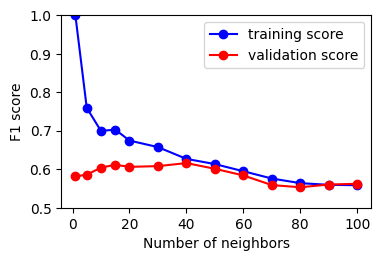

In [471]:
plt.figure(figsize=(4,2.5))
plt.plot(n_neighbors_k3, np.mean(train_score_k3, axis=1),'o-', color='blue', label='training score')
plt.plot(n_neighbors_k3, np.mean(val_score_k3, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.5,1)
plt.xlabel('Number of neighbors')
plt.ylabel('F1 score')

In [472]:
knn4=KNeighborsClassifier(p=1,n_neighbors=40)

In [473]:
train_sizes_knn4, training_scores_knn4, validation_scores_knn4, fit_times_knn4, _ = learning_curve(knn4, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1',return_times=True, random_state=8)

In [474]:
train_scores_mean_knn4 = np.mean(training_scores_knn4,axis = 1)
validation_scores_mean_knn4 = np.mean(validation_scores_knn4, axis = 1 )
train_scores_std_knn4 = np.std(training_scores_knn4,axis = 1)
validation_scores_std_knn4 = np.std(validation_scores_knn4, axis = 1 )
fit_times_mean_knn4=np.mean(fit_times_knn4,axis=1)
fit_times_std_knn4=np.std(fit_times_knn4,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_knn4, index = train_sizes_knn4))
print('\n', '-' * 20) # separator 
print('Mean training scores\n\n', pd.Series(validation_scores_mean_knn4, index = train_sizes_knn4))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_knn4, index = train_sizes_knn4))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_knn4, index = train_sizes_knn4))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_knn4, index=train_sizes_knn4))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_knn4, index=train_sizes_knn4))

Mean training scores

 50     0.000000
100    0.345182
200    0.566710
300    0.588762
429    0.625052
dtype: float64

 --------------------
Mean training scores

 50     0.000000
100    0.314396
200    0.544627
300    0.545717
429    0.615972
dtype: float64

 --------------------
Std training scores

 50     0.000000
100    0.217837
200    0.054080
300    0.070873
429    0.009214
dtype: float64

 --------------------
Std validation scores

 50     0.000000
100    0.182496
200    0.090903
300    0.059838
429    0.064593
dtype: float64

 --------------------
fit time

 50     0.000519
100    0.000518
200    0.000516
300    0.000556
429    0.000785
dtype: float64

 --------------------
fit time

 50     0.000097
100    0.000070
200    0.000040
300    0.000055
429    0.000234
dtype: float64


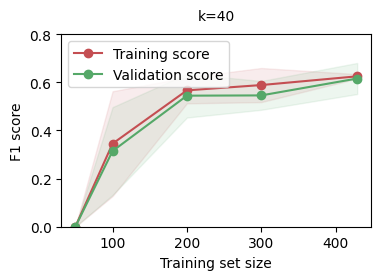

In [476]:
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_knn4, train_scores_mean_knn4 - train_scores_std_knn4, train_scores_mean_knn4 + train_scores_std_knn4, alpha=0.1, color="r")
plt.fill_between(train_sizes_knn4, validation_scores_mean_knn4- validation_scores_std_knn4  , validation_scores_mean_knn4+ validation_scores_std_knn4 , alpha=0.1, color="g")
plt.plot(train_sizes_knn4, train_scores_mean_knn4, 'o-', color="r", label="Training score")
plt.plot(train_sizes_knn4, validation_scores_mean_knn4, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('k=40', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0,.8)
plt.legend(loc='best')

In [ ]:
#svm

In [386]:
svc = SVC(random_state=21, gamma='scale')

In [387]:
accuracy_score_svc = np.mean(cross_val_score(svc,X_train, y_train, scoring ='accuracy' , cv=5))
accuracy_score_svc

0.767220491519557

In [388]:
precision_score_svc = np.mean(cross_val_score(svc,X_train, y_train, scoring ='precision' , cv=5))
precision_score_svc

0.7245517241379311

In [389]:
recall_score_svc = np.mean(cross_val_score(svc,X_train, y_train, scoring ='recall' , cv=5))
recall_score_svc

0.5396870554765292

In [390]:
f1_svc=np.mean(cross_val_score(svc,X_train, y_train, scoring ='f1' , cv=5))
f1_svc

0.6169330202618672

In [391]:
roc_auc_score_svc=np.mean(cross_val_score(svc,X_train, y_train, scoring ='roc_auc' , cv=5))
roc_auc_score_svc

0.8366510871774029

In [ ]:
# building svm model (rbf kernel) and checking its performance using learning curve 

In [392]:
svc_rbf = SVC(random_state=21, gamma='scale',kernel='rbf')

In [393]:
train_sizes_svc1, training_scores_svc1, validation_scores_svc1,fit_times_svc1,_ = learning_curve(svc_rbf, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True, random_state=8)

In [394]:
train_scores_mean_svc1 = np.mean(training_scores_svc1,axis = 1)
validation_scores_mean_svc1 = np.mean(validation_scores_svc1, axis = 1 )
train_scores_std_svc1 = np.std(training_scores_svc1,axis = 1)
validation_scores_std_svc1 = np.std(validation_scores_svc1, axis = 1 )
fit_times_mean_svc1=np.mean(fit_times_svc1,axis=1)
fit_times_std_svc1=np.std(fit_times_svc1,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svc1, index = train_sizes_svc1))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_svc1, index = train_sizes_svc1))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_svc1, index = train_sizes_svc1))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_svc1, index = train_sizes_svc1))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_svc1, index=train_sizes_svc1))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_svc1, index=train_sizes_svc1))

Mean training scores

 50     0.831392
100    0.835056
200    0.817256
300    0.759264
429    0.747525
dtype: float64

 --------------------
Mean validation scores

 50     0.525987
100    0.610060
200    0.606244
300    0.584240
429    0.616933
dtype: float64

 --------------------
Std training scores

 50     0.074529
100    0.040042
200    0.018933
300    0.009761
429    0.022989
dtype: float64

 --------------------
Std validation scores

 50     0.100660
100    0.068517
200    0.051072
300    0.053513
429    0.052221
dtype: float64

 --------------------
fit time

 50     0.000974
100    0.001198
200    0.002071
300    0.002773
429    0.004329
dtype: float64

 --------------------
fit time

 50     0.000178
100    0.000390
200    0.000491
300    0.000287
429    0.000314
dtype: float64


(0.2, 0.9)

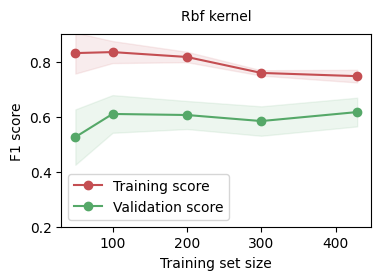

In [421]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_svc1, train_scores_mean_svc1 - train_scores_std_svc1, train_scores_mean_svc1 + train_scores_std_svc1, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc1, validation_scores_mean_svc1 - validation_scores_std_svc1  , validation_scores_mean_svc1+ validation_scores_std_svc1 , alpha=0.1, color="g")
plt.plot(train_sizes_svc1, train_scores_mean_svc1, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svc1, validation_scores_mean_svc1, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Rbf kernel', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.2,.9)

In [ ]:
# building svm model (polynomial kernel) and checking its performance using learning curve 

In [397]:
svc_poly = SVC(random_state=21, gamma='scale',kernel='poly')

In [398]:
train_sizes_svc2, training_scores_svc2, validation_scores_svc2,fit_times_svc2,_ = learning_curve(svc_poly, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True, random_state=8)

In [400]:
train_scores_mean_svc2 = np.mean(training_scores_svc2,axis = 1)
validation_scores_mean_svc2 = np.mean(validation_scores_svc2, axis = 1 )
train_scores_std_svc2 = np.std(training_scores_svc2,axis = 1)
validation_scores_std_svc2 = np.std(validation_scores_svc2, axis = 1 )
fit_times_mean_svc2=np.mean(fit_times_svc2,axis=1)
fit_times_std_svc2=np.std(fit_times_svc2,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svc2, index = train_sizes_svc2))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_svc2, index = train_sizes_svc2))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_svc2, index = train_sizes_svc2))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_svc2, index = train_sizes_svc2))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_svc2, index=train_sizes_svc2))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_svc2, index=train_sizes_svc2))

Mean training scores

 50     0.582096
100    0.732427
200    0.654357
300    0.648890
429    0.647710
dtype: float64

 --------------------
Mean validation scores

 50     0.356935
100    0.466323
200    0.531532
300    0.493798
429    0.525341
dtype: float64

 --------------------
Std training scores

 50     0.181311
100    0.031638
200    0.052371
300    0.044543
429    0.018591
dtype: float64

 --------------------
Std validation scores

 50     0.098062
100    0.061211
200    0.093958
300    0.059977
429    0.083964
dtype: float64

 --------------------
fit time

 50     0.000822
100    0.001010
200    0.001505
300    0.002278
429    0.003798
dtype: float64

 --------------------
fit time

 50     0.000087
100    0.000072
200    0.000071
300    0.000180
429    0.000418
dtype: float64


(0.2, 0.9)

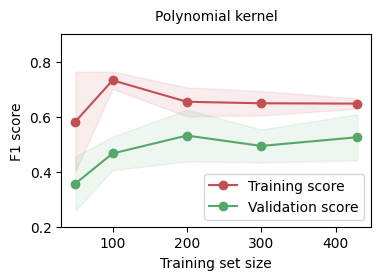

In [420]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_svc2, train_scores_mean_svc2 - train_scores_std_svc2, train_scores_mean_svc2 + train_scores_std_svc2, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc2, validation_scores_mean_svc2 - validation_scores_std_svc2  , validation_scores_mean_svc2+ validation_scores_std_svc2 , alpha=0.1, color="g")
plt.plot(train_sizes_svc2, train_scores_mean_svc2, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svc2, validation_scores_mean_svc2, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Polynomial kernel', fontsize = 10, y = 1.03)
plt.legend(loc='lower right')
plt.ylim(0.2,.9)

In [ ]:
# building svm model (linear kernel) and checking its performance using learning curve 

In [402]:
svc_linear = SVC(random_state=21, gamma='scale',kernel='linear')

In [403]:
train_sizes_svc3, training_scores_svc3, validation_scores_svc3,fit_times_svc3,_ = learning_curve(svc_linear, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True, random_state=8)

In [404]:
train_scores_mean_svc3 = np.mean(training_scores_svc3,axis = 1)
validation_scores_mean_svc3 = np.mean(validation_scores_svc3, axis = 1 )
train_scores_std_svc3 = np.std(training_scores_svc3,axis = 1)
validation_scores_std_svc3 = np.std(validation_scores_svc3, axis = 1 )
fit_times_mean_svc3=np.mean(fit_times_svc3,axis=1)
fit_times_std_svc3=np.std(fit_times_svc3,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svc3, index = train_sizes_svc3))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_svc3, index = train_sizes_svc3))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_svc3, index = train_sizes_svc3))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_svc3, index = train_sizes_svc3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_svc3, index=train_sizes_svc3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_svc3, index=train_sizes_svc3))

Mean training scores

 50     0.721753
100    0.715261
200    0.673729
300    0.659028
429    0.656998
dtype: float64

 --------------------
Mean validation scores

 50     0.630561
100    0.663674
200    0.645889
300    0.629936
429    0.639836
dtype: float64

 --------------------
Std training scores

 50     0.059601
100    0.066064
200    0.032082
300    0.021767
429    0.013842
dtype: float64

 --------------------
Std validation scores

 50     0.056506
100    0.055033
200    0.043762
300    0.043023
429    0.031009
dtype: float64

 --------------------
fit time

 50     0.000877
100    0.001026
200    0.001942
300    0.002733
429    0.004380
dtype: float64

 --------------------
fit time

 50     0.000121
100    0.000047
200    0.000613
300    0.000377
429    0.000304
dtype: float64


(0.2, 0.9)

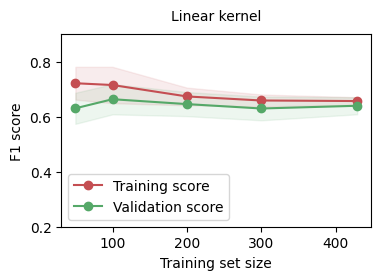

In [480]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_svc3, train_scores_mean_svc3 - train_scores_std_svc3, train_scores_mean_svc3 + train_scores_std_svc3, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc3, validation_scores_mean_svc3 - validation_scores_std_svc3  , validation_scores_mean_svc3+ validation_scores_std_svc3 , alpha=0.1, color="g")
plt.plot(train_sizes_svc3, train_scores_mean_svc3, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svc3, validation_scores_mean_svc3, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Linear kernel', fontsize = 10, y = 1.03)
plt.legend(loc='lower left')
plt.ylim(0.2,.9)

In [ ]:
# checking for best C value for linear kernel (using coarse grid search and model complexity curve)

In [477]:
param_grid = {"C": [0.001,0.1,0.5,1,10]}

# Create a basic model
svc_linear = SVC(random_state=21, gamma='scale',kernel='linear')
# Instantiate the grid search model
svc_linear_grid = GridSearchCV(estimator = svc_linear, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
svc_linear_grid.fit(X_train, y_train)
print(svc_linear_grid.best_params_)
score=svc_linear_grid.best_score_
print("f1: %s" % '{:.2%}'.format(score))

{'C': 0.5}
f1: 64.42%


In [478]:
C_value = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
train_score_svc4, val_score_svc4 = validation_curve(svc_linear ,X_train, y_train,
                                          param_name ='C', param_range=C_value, cv=5, scoring='f1', n_jobs=-1, verbose=1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished


Text(0, 0.5, 'F1 score')

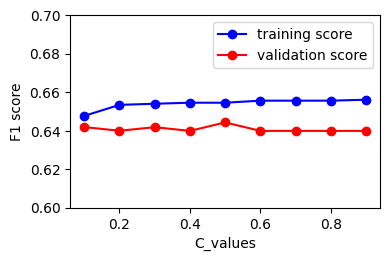

In [479]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.plot(C_value, np.mean(train_score_svc4, axis=1),'o-', color='blue', label='training score')
plt.plot(C_value, np.mean(val_score_svc4, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.6, .7)
plt.xlabel('C_values')
plt.ylabel('F1 score')

In [411]:
svc_linear2 = SVC(random_state=21, gamma='scale',kernel='linear',C=0.5)

In [412]:
train_sizes_svc5, training_scores_svc5, validation_scores_svc5,fit_times_svc5,_ = learning_curve(svc_linear2, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True, random_state=8)

In [413]:
train_scores_mean_svc5 = np.mean(training_scores_svc5,axis = 1)
validation_scores_mean_svc5 = np.mean(validation_scores_svc5, axis = 1 )
train_scores_std_svc5 = np.std(training_scores_svc5,axis = 1)
validation_scores_std_svc5 = np.std(validation_scores_svc5, axis = 1 )
fit_times_mean_svc5=np.mean(fit_times_svc5,axis=1)
fit_times_std_svc5=np.std(fit_times_svc5,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_svc5, index = train_sizes_svc5))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_svc5, index = train_sizes_svc5))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_svc5, index = train_sizes_svc5))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_svc5, index = train_sizes_svc5))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_svc5, index=train_sizes_svc5))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_svc5, index=train_sizes_svc5))

Mean training scores

 50     0.707399
100    0.706367
200    0.669717
300    0.658767
429    0.653948
dtype: float64

 --------------------
Mean validation scores

 50     0.634378
100    0.677682
200    0.649616
300    0.634225
429    0.644240
dtype: float64

 --------------------
Std training scores

 50     0.062727
100    0.072534
200    0.032917
300    0.026286
429    0.012847
dtype: float64

 --------------------
Std validation scores

 50     0.072505
100    0.061404
200    0.048390
300    0.039190
429    0.028319
dtype: float64

 --------------------
fit time

 50     0.001002
100    0.000917
200    0.001660
300    0.002157
429    0.003673
dtype: float64

 --------------------
fit time

 50     0.000266
100    0.000051
200    0.000319
300    0.000219
429    0.000529
dtype: float64


(0.2, 0.9)

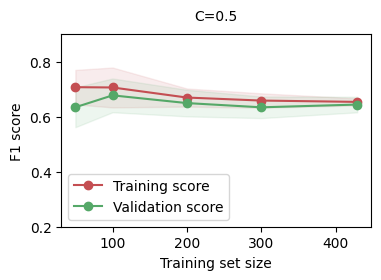

In [418]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_svc5, train_scores_mean_svc5 - train_scores_std_svc5, train_scores_mean_svc5 + train_scores_std_svc5, alpha=0.1, color="r")
plt.fill_between(train_sizes_svc5, validation_scores_mean_svc5 - validation_scores_std_svc5  , validation_scores_mean_svc5+ validation_scores_std_svc5 , alpha=0.1, color="g")
plt.plot(train_sizes_svc5, train_scores_mean_svc5, 'o-', color="r", label="Training score")
plt.plot(train_sizes_svc5, validation_scores_mean_svc5, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('C=0.5', fontsize = 10, y = 1.03)
plt.legend(loc='lower left')
plt.ylim(0.2,.9)

In [ ]:
# checking performance of final svm on test set

In [422]:
start = time.time()
svc_linear2.fit(X_train,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.006707s


In [423]:
start = time.time()
y_pred_svc=svc_linear2.predict(X_test)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.000985s


Text(-7.75, 0.5, 'True label')

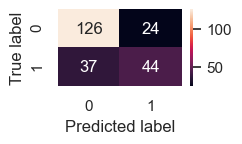

In [424]:
plt.figure(figsize=(2,1))
sns.set(font_scale=1)
matrix=confusion_matrix(y_test,y_pred_svc)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [425]:
precision_scorer(svc_linear2, X_test,y_test)

0.6470588235294118

In [426]:
recall_scorer(svc_linear2, X_test,y_test)

0.5432098765432098

In [427]:
f1_scorer(svc_linear2, X_test,y_test)

0.5906040268456375

In [428]:
roc_auc_scorer(svc_linear2, X_test,y_test)

0.7971193415637859

In [429]:
accuracy_scorer (svc_linear2, X_test,y_test)

0.7359307359307359

In [433]:
#adaboost

In [434]:
ada = AdaBoostClassifier(random_state=21)

In [435]:
accuracy_score_ada = np.mean(cross_val_score(ada,X_train, y_train, scoring ='accuracy' , cv=5))
accuracy_score_ada

0.733748701973001

In [436]:
precision_score_ada = np.mean(cross_val_score(ada,X_train, y_train, scoring ='precision' , cv=5))
precision_score_ada

0.6273660622519789

In [437]:
recall_score_ada = np.mean(cross_val_score(ada,X_train, y_train, scoring ='recall' , cv=5))
recall_score_ada

0.5826458036984354

In [438]:
f1_ada=np.mean(cross_val_score(ada,X_train, y_train, scoring ='f1' , cv=5))
f1_ada

0.6025793910558624

In [439]:
roc_auc_score_ada=np.mean(cross_val_score(ada,X_train, y_train, scoring ='roc_auc' , cv=5))
roc_auc_score_ada

0.8028744157691527

In [ ]:
# checking performance of adaboost base model using learning curve

In [440]:
train_sizes_ada, training_scores_ada, validation_scores_ada, fit_times_ada, _ = learning_curve(ada, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True, random_state=8)

In [441]:
train_scores_mean_ada = np.mean(training_scores_ada,axis = 1)
validation_scores_mean_ada = np.mean(validation_scores_ada, axis = 1 )
train_scores_std_ada = np.std(training_scores_ada,axis = 1)
validation_scores_std_ada = np.std(validation_scores_ada, axis = 1 )
fit_times_mean_ada=np.mean(fit_times_ada,axis=1)
fit_times_std_ada=np.std(fit_times_ada,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_ada, index = train_sizes_ada))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_ada, index = train_sizes_ada))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_ada, index = train_sizes_ada))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_ada, index = train_sizes_ada))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_ada, index=train_sizes_ada))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_ada, index=train_sizes_ada))

Mean training scores

 50     1.000000
100    1.000000
200    0.969283
300    0.876635
429    0.808875
dtype: float64

 --------------------
Mean validation scores

 50     0.602826
100    0.653977
200    0.633397
300    0.643569
429    0.604778
dtype: float64

 --------------------
Std training scores

 50     0.000000
100    0.000000
200    0.015389
300    0.007027
429    0.024863
dtype: float64

 --------------------
Std validation scores

 50     0.094023
100    0.085928
200    0.039211
300    0.052264
429    0.076107
dtype: float64

 --------------------
fit time

 50     0.079644
100    0.080354
200    0.082341
300    0.086358
429    0.092405
dtype: float64

 --------------------
fit time

 50     0.001974
100    0.002074
200    0.003550
300    0.004096
429    0.004381
dtype: float64


(0.4, 1.0)

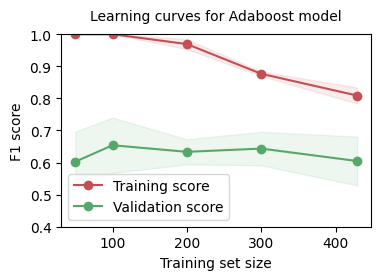

In [759]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_ada, train_scores_mean_ada - train_scores_std_ada, train_scores_mean_ada + train_scores_std_ada, alpha=0.1, color="r")
plt.fill_between(train_sizes_ada, validation_scores_mean_ada - validation_scores_std_ada  , validation_scores_mean_ada+ validation_scores_std_ada , alpha=0.1, color="g")
plt.plot(train_sizes_ada, train_scores_mean_ada, 'o-', color="r", label="Training score")
plt.plot(train_sizes_ada, validation_scores_mean_ada, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for Adaboost model', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.4,1)

In [ ]:
# checking for best hyperparameters using coarse grid search and model complexity curve

In [443]:
param_grid = {'base_estimator': [None,DecisionTreeClassifier(ccp_alpha=0.1),DecisionTreeClassifier(ccp_alpha=0.5),DecisionTreeClassifier(ccp_alpha=0.0)]}
# Create a basic model
ada =  AdaBoostClassifier(random_state=21)
# Instantiate the grid search model
ada_coarse_grid1 = GridSearchCV(estimator = ada, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
ada_coarse_grid1.fit(X_train, y_train)
print(ada_coarse_grid1.best_params_)
score=ada_coarse_grid1.best_score_
print("f1: %s" % '{:.2%}'.format(score))

{'base_estimator': None}
f1: 60.26%


In [444]:
param_grid = {'n_estimators': [50,100,600],'base_estimator': [None,DecisionTreeClassifier(ccp_alpha=0.1),DecisionTreeClassifier(ccp_alpha=0.5),DecisionTreeClassifier(ccp_alpha=0.0)]}
# Create a basic model
ada =  AdaBoostClassifier(random_state=21)
# Instantiate the grid search model
ada_coarse_grid1 = GridSearchCV(estimator = ada, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 0, scoring = 'f1' )
ada_coarse_grid1.fit(X_train, y_train)
print(ada_coarse_grid1.best_params_)
score=ada_coarse_grid1.best_score_
print("roc_auc: %s" % '{:.2%}'.format(score))

{'base_estimator': None, 'n_estimators': 100}
roc_auc: 63.19%


In [445]:
n_estimators= [10,50,100,150,200,250,300,350,400,450,500]

# Create a basic model
ada2= AdaBoostClassifier(random_state=21,base_estimator=None)
train_score_ada2, val_score_ada2 = validation_curve(ada2 ,X_train, y_train,
                                          param_name ='n_estimators', param_range=n_estimators, cv=5, scoring='f1', n_jobs=-1, verbose=1)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 out of  55 | elapsed:    8.2s finished


Text(0, 0.5, 'F1 score')

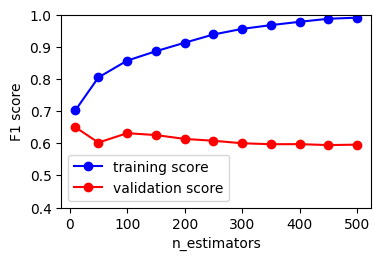

In [446]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.plot(n_estimators, np.mean(train_score_ada2, axis=1),'o-', color='blue', label='training score')
plt.plot(n_estimators, np.mean(val_score_ada2, axis=1), 'o-',color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.4, 1)
plt.xlabel('n_estimators')
plt.ylabel('F1 score')

In [761]:
# building final adaboost model and checking its performance using learning curve

In [447]:
ada3= AdaBoostClassifier(random_state=21,base_estimator=None,n_estimators=10)

In [448]:
train_sizes_ada3, training_scores_ada3, validation_scores_ada3, fit_times_ada3, _ = learning_curve(ada3, X_train, y_train, shuffle=True, train_sizes=train_sizes, cv=5, scoring = 'f1', return_times=True, random_state=8)

In [449]:
train_scores_mean_ada3 = np.mean(training_scores_ada3,axis = 1)
validation_scores_mean_ada3 = np.mean(validation_scores_ada3, axis = 1 )
train_scores_std_ada3 = np.std(training_scores_ada3,axis = 1)
validation_scores_std_ada3 = np.std(validation_scores_ada3, axis = 1 )
fit_times_mean_ada3=np.mean(fit_times_ada3,axis=1)
fit_times_std_ada3=np.std(fit_times_ada3,axis=1)
print('Mean training scores\n\n', pd.Series(train_scores_mean_ada3, index = train_sizes_ada3))
print('\n', '-' * 20) # separator
print('Mean validation scores\n\n',pd.Series(validation_scores_mean_ada3, index = train_sizes_ada3))
print('\n', '-' * 20) # separator

print('Std training scores\n\n', pd.Series(train_scores_std_ada3, index = train_sizes_ada3))
print('\n', '-' * 20) # separator
print('Std validation scores\n\n',pd.Series(validation_scores_std_ada3, index = train_sizes_ada3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_mean_ada3, index=train_sizes_ada3))
print('\n', '-' * 20) # separator
print('fit time\n\n',pd.Series(fit_times_std_ada3, index=train_sizes_ada3))

Mean training scores

 50     0.982437
100    0.869428
200    0.770030
300    0.749704
429    0.712588
dtype: float64

 --------------------
Mean validation scores

 50     0.587858
100    0.600109
200    0.686071
300    0.659332
429    0.664275
dtype: float64

 --------------------
Std training scores

 50     0.022737
100    0.027535
200    0.035790
300    0.021113
429    0.032480
dtype: float64

 --------------------
Std validation scores

 50     0.046648
100    0.047868
200    0.045776
300    0.030086
429    0.045191
dtype: float64

 --------------------
fit time

 50     0.015936
100    0.015713
200    0.016481
300    0.018312
429    0.017831
dtype: float64

 --------------------
fit time

 50     0.000724
100    0.000547
200    0.000912
300    0.002123
429    0.000362
dtype: float64


(0.4, 1.0)

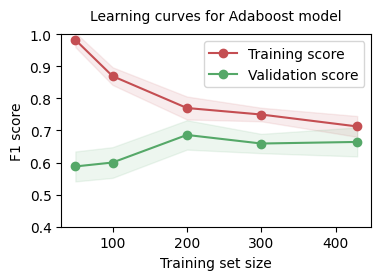

In [760]:
plt.style.use('default')
plt.figure(figsize=(4,2.5))
plt.fill_between(train_sizes_ada3, train_scores_mean_ada3 - train_scores_std_ada3, train_scores_mean_ada3 + train_scores_std_ada3, alpha=0.1, color="r")
plt.fill_between(train_sizes_ada3, validation_scores_mean_ada3 - validation_scores_std_ada3  , validation_scores_mean_ada3+ validation_scores_std_ada3 , alpha=0.1, color="g")
plt.plot(train_sizes_ada3, train_scores_mean_ada3, 'o-', color="r", label="Training score")
plt.plot(train_sizes_ada3, validation_scores_mean_ada3, 'o-', color="g", label="Validation score")
plt.ylabel('F1 score', fontsize = 10)
plt.xlabel('Training set size', fontsize = 10)
plt.title('Learning curves for Adaboost model', fontsize = 10, y = 1.03)
plt.legend()
plt.ylim(0.4,1)

In [762]:
# checking performance of adaboost final model on test set

In [452]:
start = time.time()
ada3.fit(X_train,y_train)
end = time.time()
print('fit time: {:.6f}s'.format(end - start))

fit time: 0.021329s


In [453]:
start = time.time()
y_pred_ada=ada3.predict(X_test)
end = time.time()
print('predict time: {:.6f}s'.format(end - start))

predict time: 0.003322s


Text(-7.75, 0.5, 'True label')

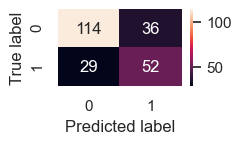

In [456]:
plt.figure(figsize=(2,1))
sns.set(font_scale=1)
matrix=confusion_matrix(y_test,y_pred_ada)
sns.set(font_scale=1)
sns.heatmap(matrix,annot=True,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [457]:
precision_scorer(ada3, X_test,y_test)

0.5909090909090909

In [458]:
recall_scorer(ada3, X_test,y_test)

0.6419753086419753

In [459]:
f1_scorer(ada3, X_test,y_test)

0.6153846153846153

In [460]:
accuracy_scorer(ada3, X_test,y_test)

0.7186147186147186

In [461]:
roc_auc_scorer(ada3, X_test,y_test)

0.7565020576131687